# User settings

In [4]:
path_to_csv = "./validation_1_features.csv"
path_to_full_data = "./train_full_1_Tims_features.csv"  
prefix = "validation"
random_seed = 42
index_start = 7
index_end = 10

# Code

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

In [6]:
#df = pd.read_csv(filepath_or_buffer=path_to_csv)
full_data = pd.read_csv(filepath_or_buffer=path_to_full_data)

In [4]:
forest_ids = df["forest_id"].unique()
forest_ids

array([  91,   96,   11,  103,  114,  119,  121,  122,  126,  127,   14,
        129,  133,  141,  149,  159,  162,  169,  170,  173,  176,   20,
        183,  185,  207,  214,  215,  216,  219,  222,  233,  236,  239,
        241,  242,  247,   29,  251,  254,  264,  265,  289,  294,  308,
        310,   34,  313,  316,  323,  325,  330,   37,  342,  362,   41,
        370,  376,  386,  387,  393,  401,   46,  411,    5,   57,   83,
       1422, 1431, 1437, 1440])

In [7]:
plt.figure(figsize=(12, 8))

# Plot for additional forest IDs
for forest_id in forest_ids[index_start:index_end]:
    forest_data = df[df["forest_id"] == forest_id]
    plt.plot(forest_data["year"], forest_data["dnbr_to_avg_window"], marker='o', label=f"Forest ID {forest_id}")

plt.xlabel(xlabel="Year")
#plt.ylabel(ylabel="Red Max Difference")
#plt.title(label="Red Max Difference Over Time for Multiple Forests")
plt.grid(visible=True)
plt.legend()
plt.show()

NameError: name 'forest_ids' is not defined

<Figure size 1200x800 with 0 Axes>

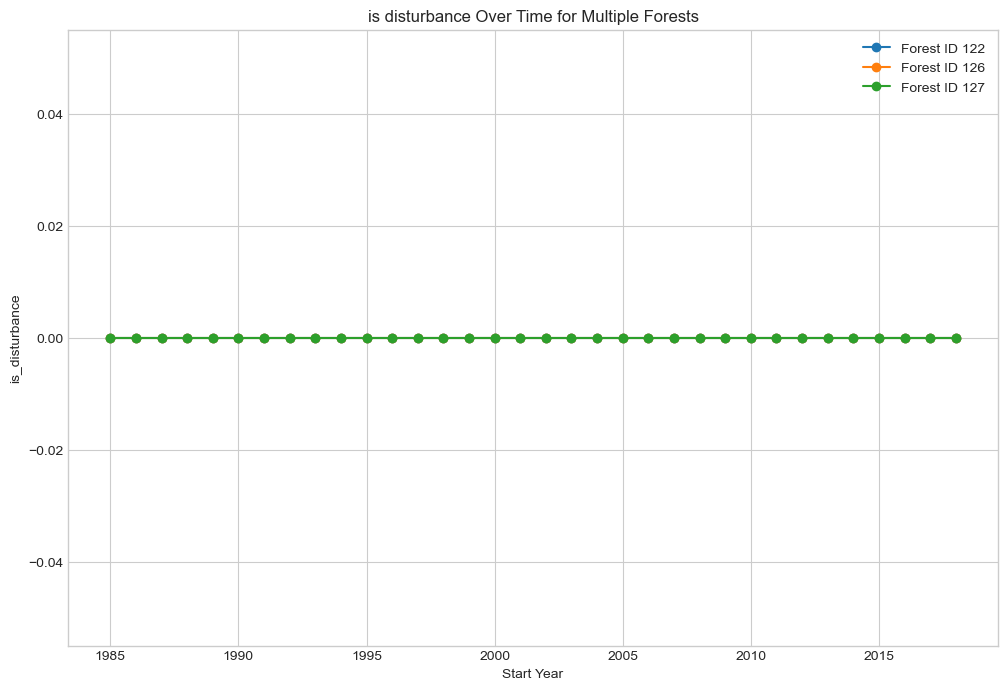

In [6]:
plt.figure(figsize=(12, 8))

# Plot for additional forest IDs
for forest_id in forest_ids[index_start:index_end]:
    forest_data = df[df["forest_id"] == forest_id]
    plt.plot(forest_data["year"], forest_data["is_disturbance"], marker='o', label=f"Forest ID {forest_id}")

plt.xlabel(xlabel="Start Year")
plt.ylabel(ylabel="is_disturbance")
plt.title(label="is disturbance Over Time for Multiple Forests")
plt.grid(visible=True)
plt.legend()
plt.show()

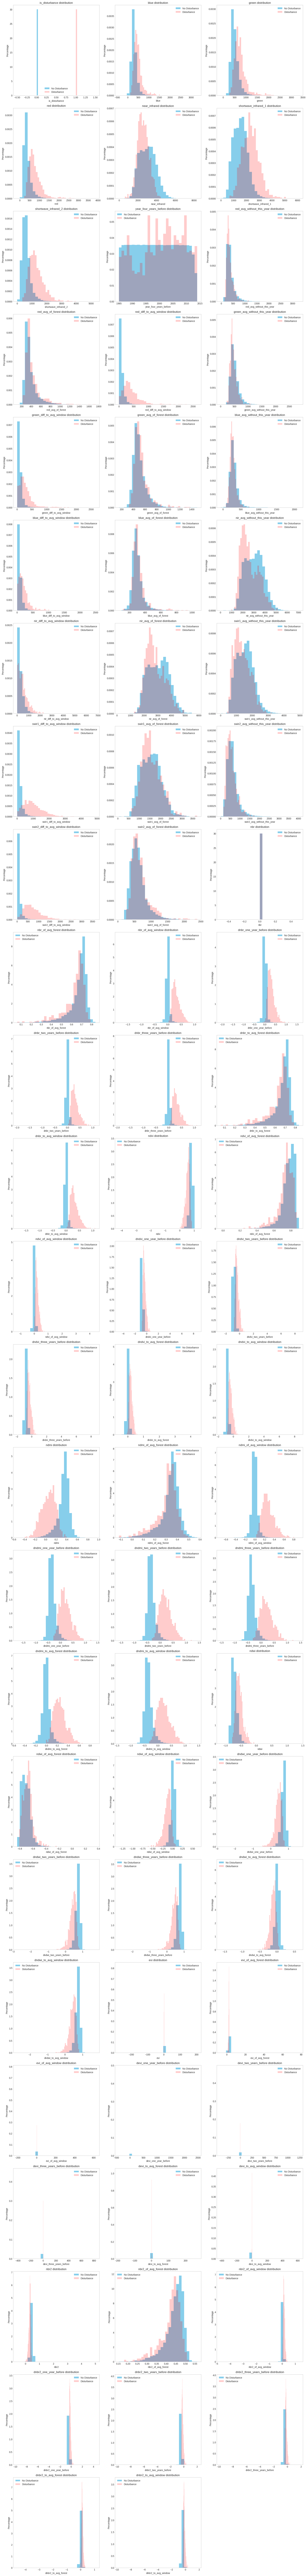

In [8]:
# Assuming full_data is your DataFrame with the necessary columns
from re import A


features_to_plot = [col for col in full_data.columns if col not in ["year", "forest_id"]]

# Calculate how many rows we need (3 plots per row)
num_features = len(features_to_plot)
num_rows = int(np.ceil(num_features / 3))

# Create subplots with calculated rows and 3 columns
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
axes = axes.flatten()  # Flatten to make indexing easier

# Plot each feature
for i, feature in enumerate(features_to_plot):
    if i < len(axes):  # Make sure we don't exceed the number of available subplots
        ax = axes[i]
        
        # Plot histograms on the current axis
        ax.hist(
            full_data[full_data["is_disturbance"] == 0][feature].dropna(),
            bins=30,
            color='skyblue',
            label='No Disturbance',
            density=True
        )
        ax.hist(
            full_data[full_data["is_disturbance"] == 1][feature].dropna(),
            bins=30,
            color='red',
            label='Disturbance',
            alpha=0.2,
            density=True
        )
        
        # Add labels and title
        ax.set_xlabel(feature)
        ax.set_ylabel("Percentage")
        ax.set_title(f"{feature} distribution")
        ax.grid(False)
        ax.legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

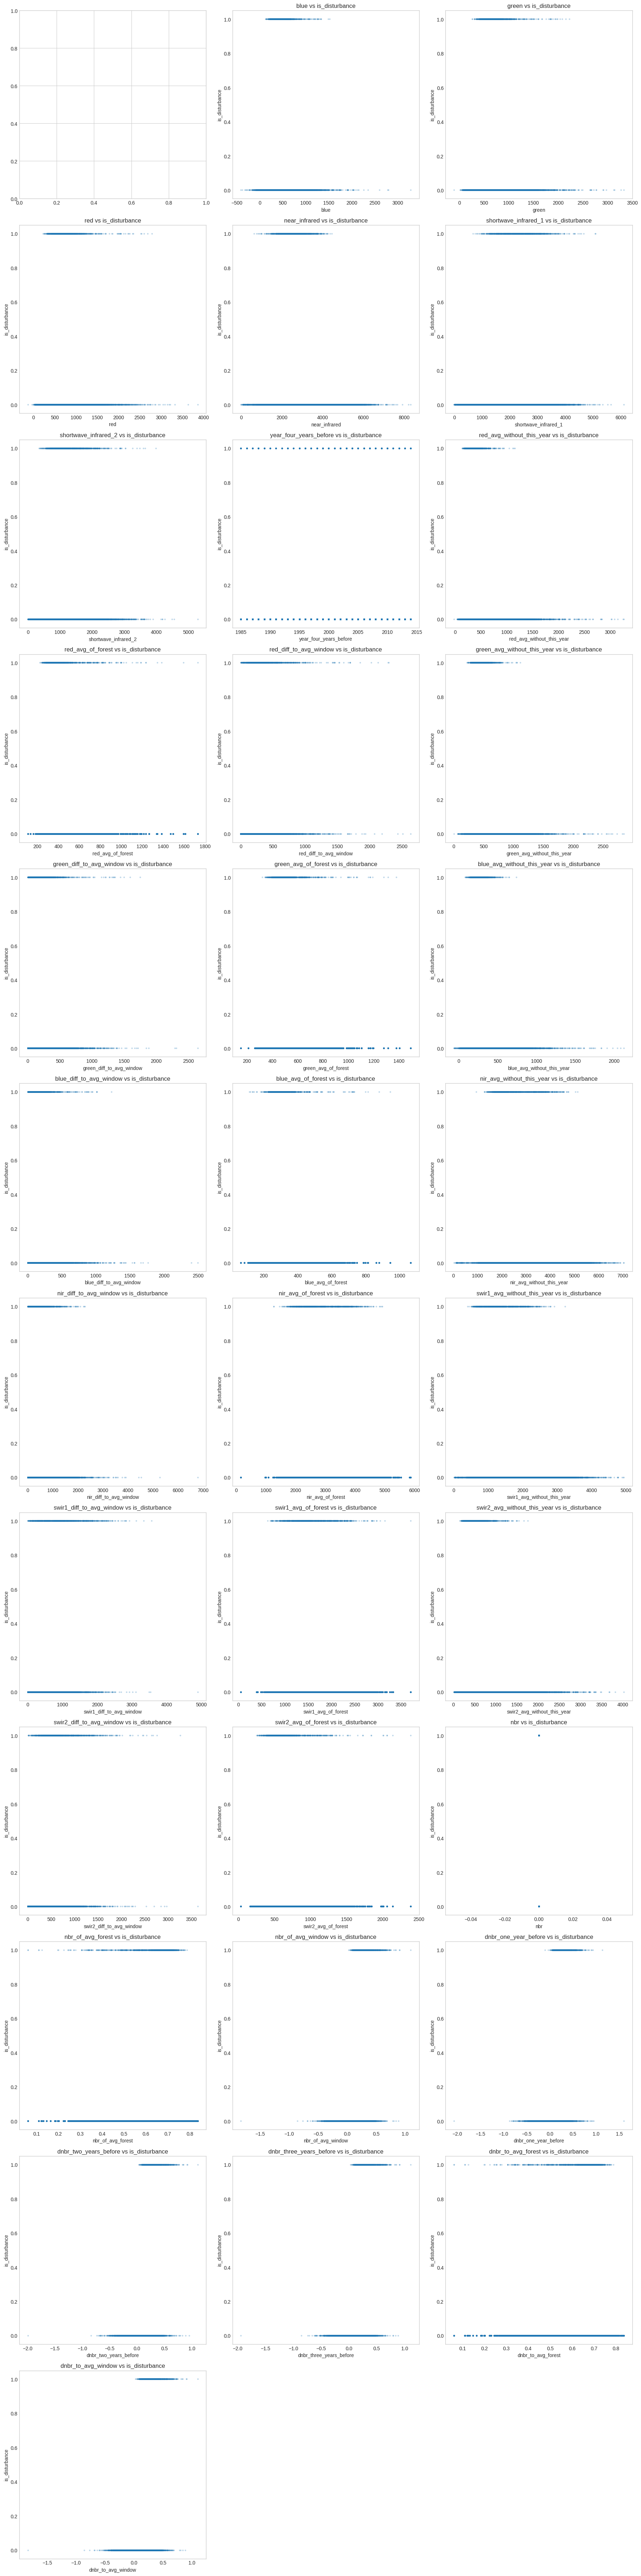

In [41]:
# Scatter plots for each feature vs is_disturbance
num_features = len(features_to_plot)
num_rows = int(np.ceil(num_features / 3))
fig, axes = plt.subplots(num_rows, 3, figsize=(18, 6 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    if feature == "is_disturbance":
        continue  # Skip plotting is_disturbance vs itself
    ax = axes[i]
    ax.scatter(full_data[feature], full_data["is_disturbance"], alpha=0.2, s=5)
    ax.set_xlabel(feature)
    ax.set_ylabel("is_disturbance")
    ax.set_title(f"{feature} vs is_disturbance")
    ax.grid(False)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

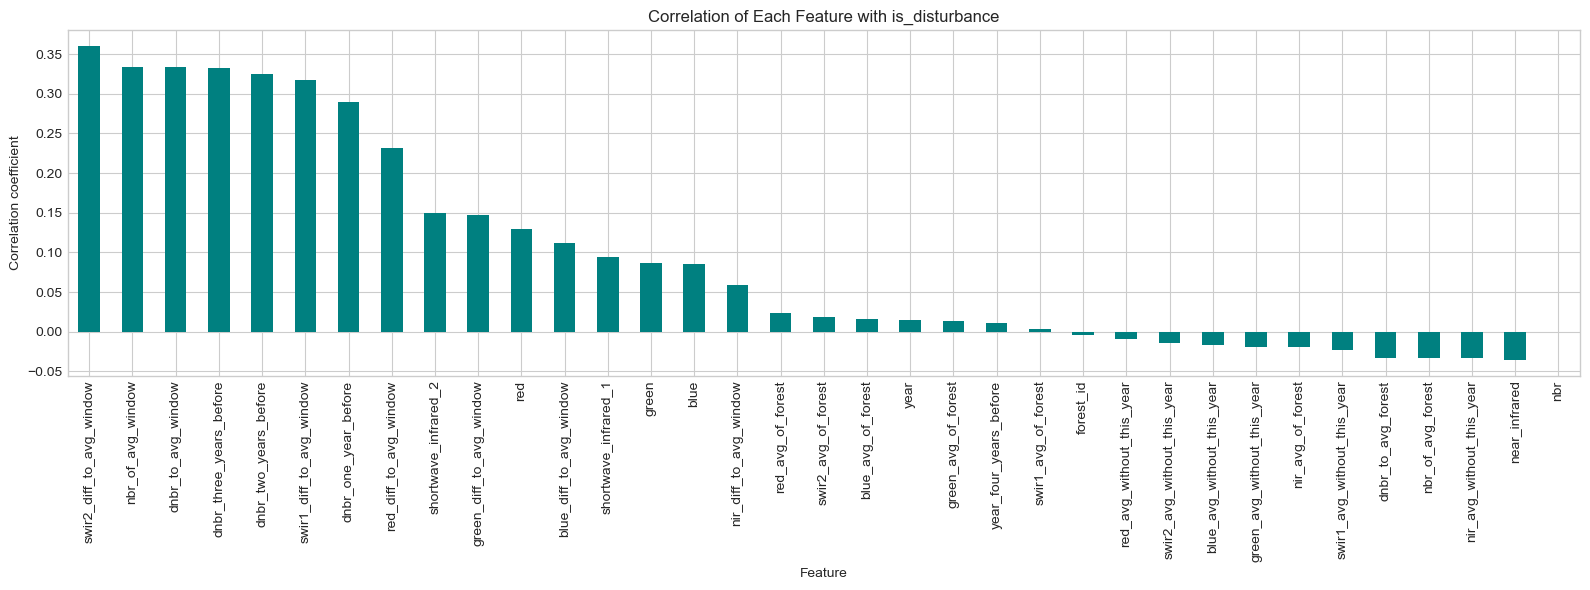

In [ ]:
correlations = full_data.corr(numeric_only=True)["is_disturbance"]
correlations.sort_values(ascending=False).plot(kind='bar', figsize=(16, 6), color='teal')
plt.title("Correlation of Each Feature with is_disturbance")
plt.ylabel("Correlation coefficient")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()

/tmp/ipykernel_8048/1754654526.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=["All", "Disturbance", "No Disturbance"])
/tmp/ipykernel_8048/1754654526.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=["All", "Disturbance", "No Disturbance"])
/tmp/ipykernel_8048/1754654526.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=["All", "Disturbance", "No Disturbance"])
/tmp/ipykernel_8048/1754654526.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplot

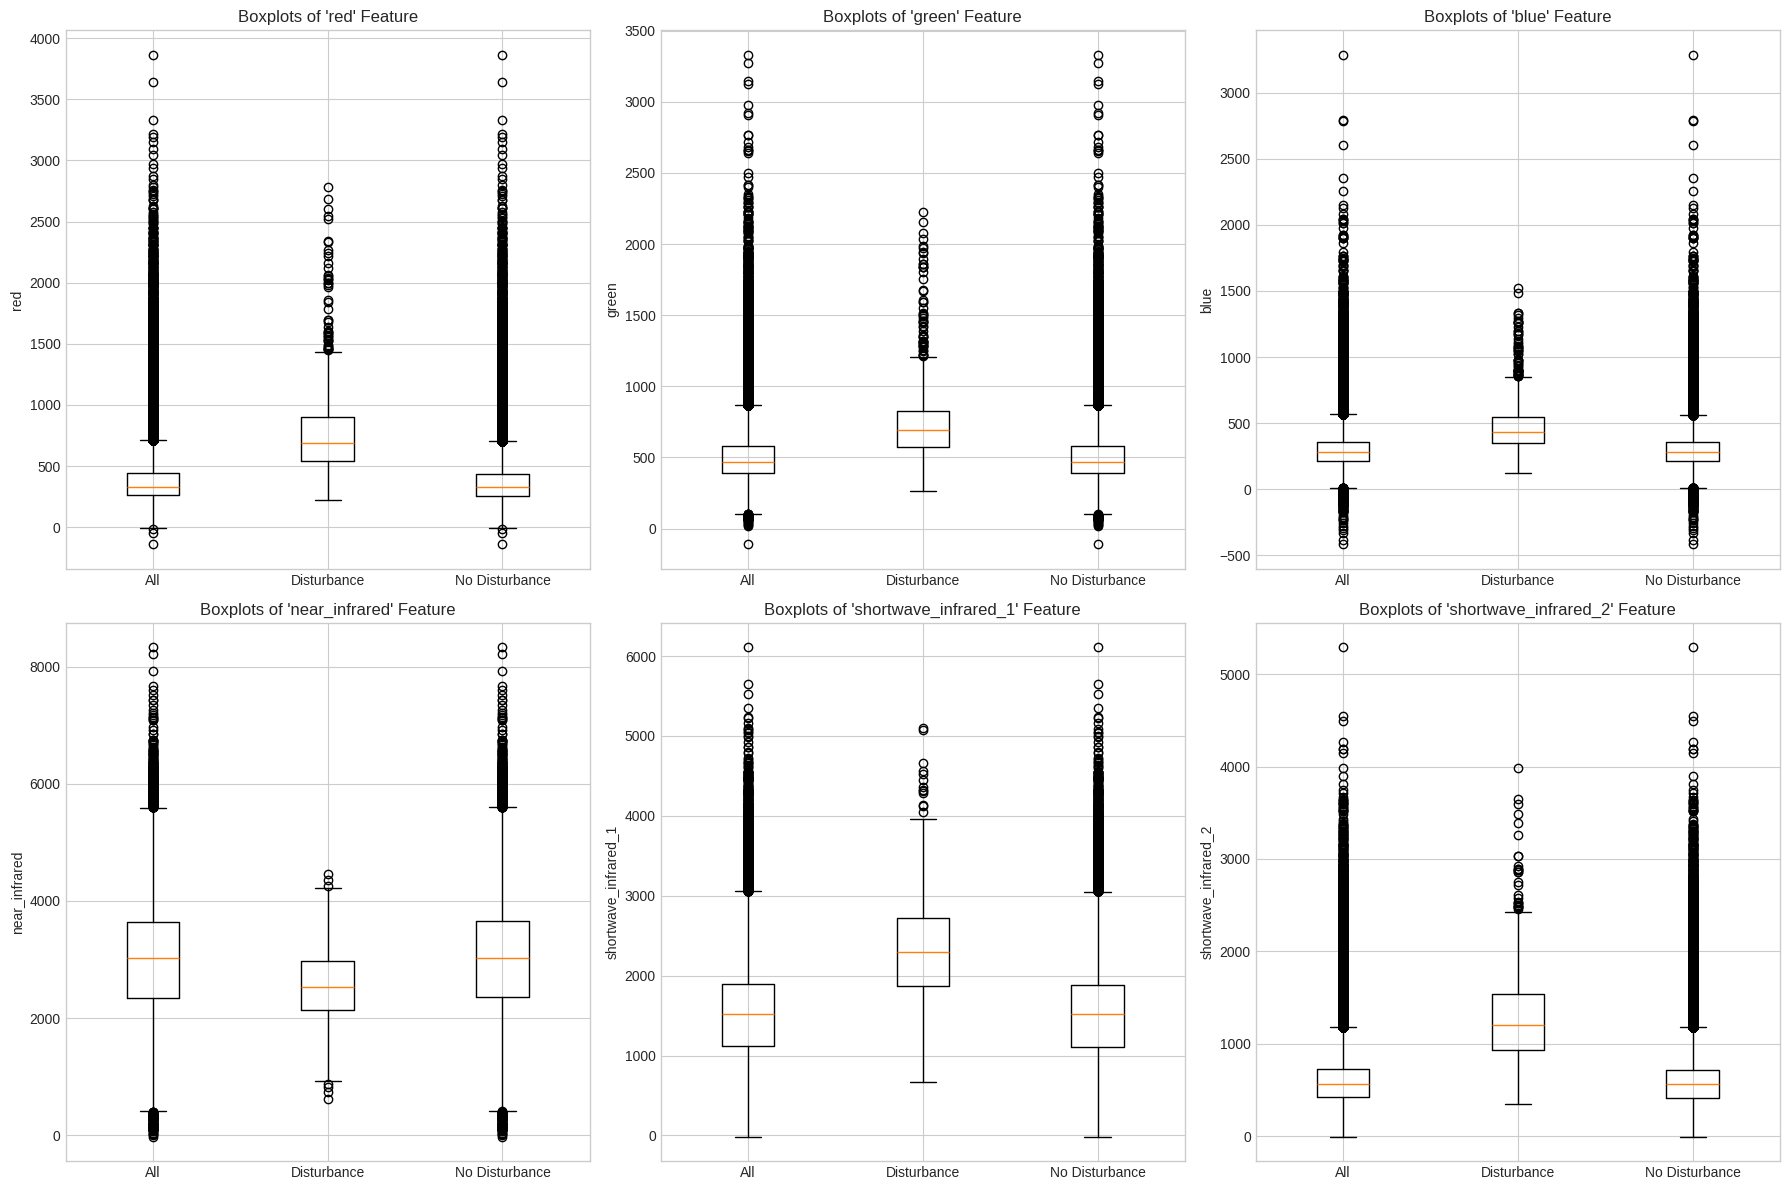

In [7]:
features = ['red', 'green', 'blue', 'near_infrared', 'shortwave_infrared_1', 'shortwave_infrared_2']
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    boxplot_data = [
        full_data[feature],
        full_data[full_data["is_disturbance"] == 1][feature],
        full_data[full_data["is_disturbance"] == 0][feature]
    ]
    plt.boxplot(boxplot_data, labels=["All", "Disturbance", "No Disturbance"])
    plt.ylabel(feature)
    plt.title(f"Boxplots of '{feature}' Feature")
plt.tight_layout()
plt.show()

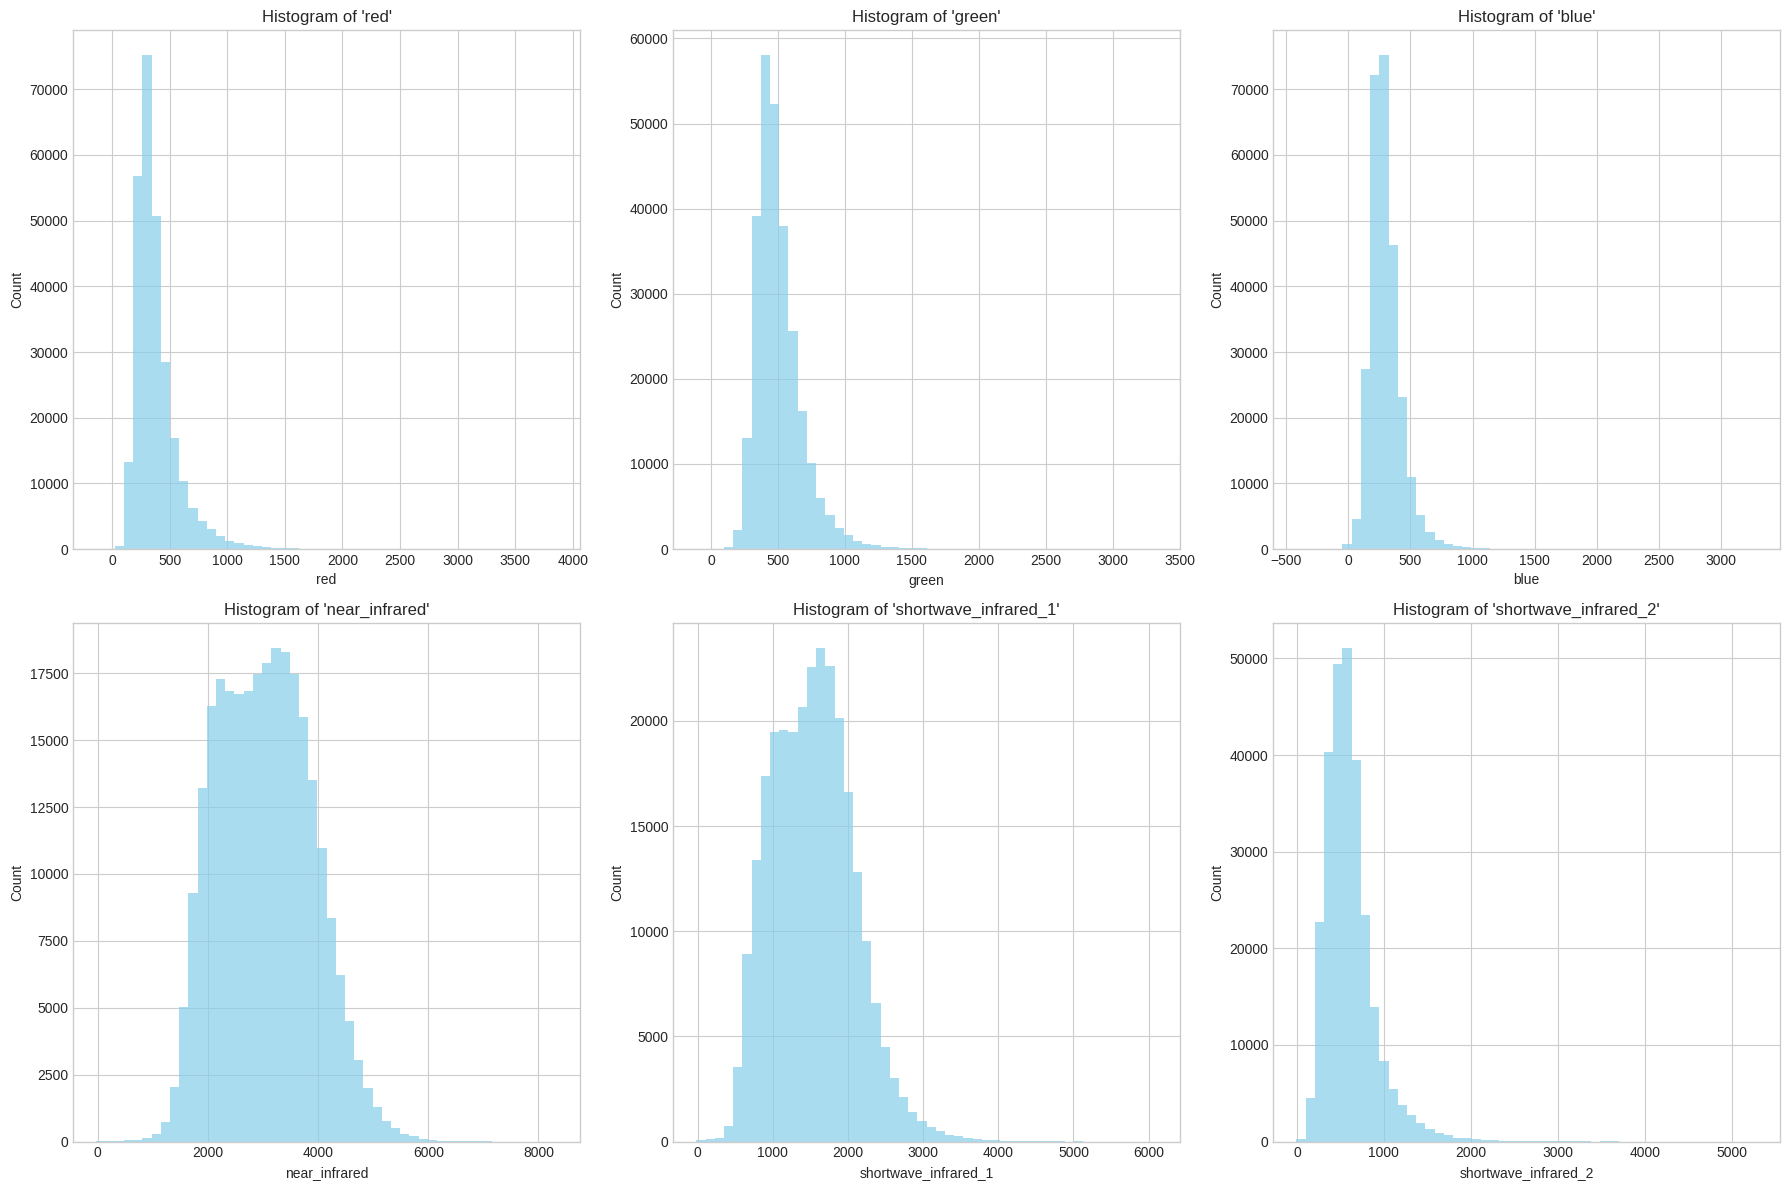

In [8]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    plt.hist(full_data[feature].dropna(), bins=50, color='skyblue', alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(f"Histogram of '{feature}'")
plt.tight_layout()
plt.show()